In [23]:
import numpy as np
import os
import pandas as pd
import json
from dscribe.descriptors import CoulombMatrix
from ase import Atoms
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib
font = {'size'   : 22}
matplotlib.rc('font', **font)

In [17]:
# Import data
os.getcwd()
os.chdir(r"C:\Users\s201204.FRIDA\Documents\Materials Design with Machine Learning\KaggleCompetition")

from LoadData import train, test

# Import info about the nr of atoms in data
from LoadData import max_number_of_atoms, min_atomic_number, max_atomic_number, species, number_of_atoms, atomic_numbers

# Import fingerprint generator
from Fingerprints import Coulombmatrices

In [15]:
print(f"Maximum number of atoms = {max_number_of_atoms}, highest atomic number = {max_atomic_number}, smallest atomic number = {min_atomic_number}")

Maximum number of atoms = 20, highest atomic number = 83, smallest atomic number = 1


In [20]:
cmats = Coulombmatrices(train, max_number_of_atoms)

0
1000
2000
3000
4000
5000
6000
7000


In [33]:
# Set target and feature vector 
X = pd.DataFrame(data = cmats, index=train.id)
y = train['hform']
print('X: {}'.format(X.shape))
print('y: {}'.format(y.shape))

X: (8000, 400)
y: (8000,)


In [29]:
# Split training data into a training set and a validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=251)

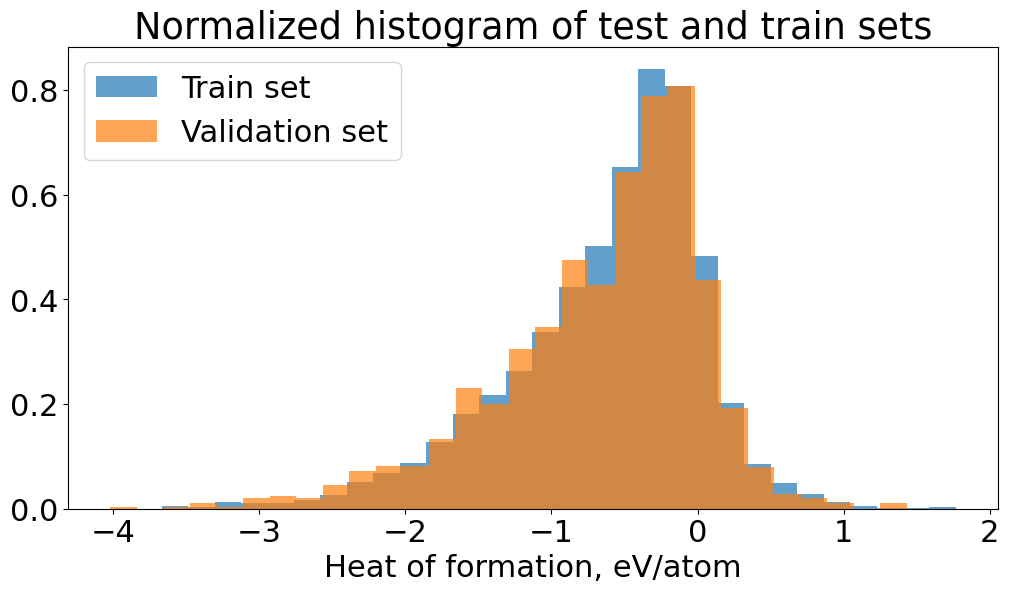

In [34]:
plt.figure(figsize = (12, 6))
plt.hist(y_train, bins=30, alpha=0.7, density=True, label='Train set')
plt.hist(y_test, bins=30, alpha=0.7, density=True, label='Validation set')

plt.title("Normalized histogram of test and train sets")
plt.xlabel("Heat of formation, eV/atom")
plt.legend()
plt.show()